In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"]='TRUE'

(454, 800)


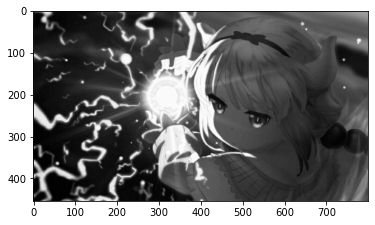

In [4]:
kanna = cv2.imread('Kanna.png')
kanna = cv2.cvtColor(kanna, cv2.COLOR_BGR2GRAY)
print(kanna.shape)
plt.imshow(kanna, cmap='gray')

## Make Histogram

[  22  655 3324 1009 1314 1566 2027 3254 2814 2393 1881 2114 2667 4789
 3578 3287 3257 2959 3163 3398 3846 4220 2690 2592 2283 2136 2152 2336
 2294 2408 2505 2500 2673 2728 2936 3001 2862 3126 2974 3102 3477 3528
 3327 3290 3340 3595 4292 4024 4649 4246 3541 3595 3602 3489 3258 3234
 3660 3030 2878 2810 3091 3017 2869 2977 3261 2954 3026 3108 3102 2911
 2841 2911 2732 2656 2799 3004 3197 2933 2578 2478 2499 2602 3030 3875
 3388 3386 3412 3198 3172 2870 3036 2872 2455 2100 1902 1736 1870 1959
 1871 1723 1562 1458 1223 1262 1265 1389 1186 1029  890  907  859  777
  756  742  643  593  562  558  509  505  465  436  448  404  407  435
  410  408  397  398  371  391  406  393  344  349  344  300  306  280
  313  316  292  287  304  306  303  311  253  278  249  243  245  253
  297  277  259  232  248  251  240  223  230  200  210  223  215  215
  215  224  191  207  234  209  200  199  214  224  229  200  219  198
  202  193  208  206  222  237  208  209  219  212  210  238  197  217
  234 

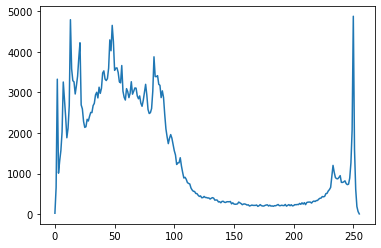

In [11]:
hist = np.zeros(256)
for i in range(256):
    hist[i] = kanna[kanna == i].shape[0]
plt.plot(hist)

# tricky way
# plt.plot(hist:=np.asarray([kanna[kanna == i].shape[0] for i in range(256)]))
# print(hist)

## Histogram Equalization

Histogram equalization can enhance the contrast of the image and improve the performance of the image.

In [12]:
trans_list = hist/ np.multiply(*kanna.shape) * 255
for i in range(1, len(trans_list)):
    trans_list[i] += trans_list[i-1]
trans_list

array([1.54460352e-02, 4.75316630e-01, 2.80907214e+00, 3.51748348e+00,
       4.44003304e+00, 5.53950991e+00, 6.96265143e+00, 9.24726046e+00,
       1.12229488e+01, 1.29030562e+01, 1.42236922e+01, 1.57079157e+01,
       1.75803965e+01, 2.09427175e+01, 2.34548045e+01, 2.57625826e+01,
       2.80492979e+01, 3.01267896e+01, 3.23475083e+01, 3.47332186e+01,
       3.74334664e+01, 4.03962968e+01, 4.22849257e+01, 4.41047494e+01,
       4.57076267e+01, 4.72072963e+01, 4.87181993e+01, 5.03582874e+01,
       5.19688877e+01, 5.36595264e+01, 5.54182682e+01, 5.71734994e+01,
       5.90501927e+01, 6.09655011e+01, 6.30268447e+01, 6.51338243e+01,
       6.71432131e+01, 6.93379543e+01, 7.14259774e+01, 7.36038684e+01,
       7.60450441e+01, 7.85220264e+01, 8.08578882e+01, 8.31677726e+01,
       8.55127616e+01, 8.80367841e+01, 9.10501652e+01, 9.38753855e+01,
       9.71394135e+01, 1.00120498e+02, 1.02606608e+02, 1.05130631e+02,
       1.07659568e+02, 1.10109169e+02, 1.12396586e+02, 1.14667153e+02,
      

In [8]:
kanna_gray = kanna.copy()
for i in range(kanna_gray.shape[0]):
    for j in range(kanna_gray.shape[1]):
        kanna_gray[i][j] = int(trans_list[kanna[i][j]])

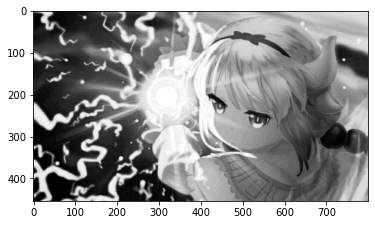

In [9]:
plt.imshow(kanna_gray, cmap='gray')

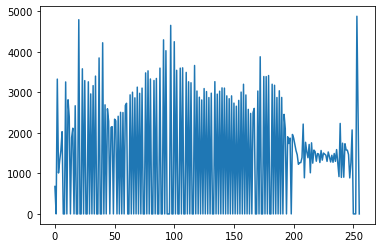

In [10]:
hist = np.zeros(256)
for i in range(256):
    hist[i] = kanna_gray[kanna_gray == i].shape[0]
plt.plot(hist)